<a href="https://colab.research.google.com/github/elikaaghaei/Rahnema_college/blob/main/%22ML%20notebooks%22/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Part

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset

In [21]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [22]:
x_train, x_test = x_train.astype('float32')/255.0 , x_test.astype('float32')/255.0

In [23]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


## Define Autoencoder Model

In [24]:
latent_dim = 64  #try for 20

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation = 'relu'),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation = 'sigmoid'),  #28*28=784
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return decoded



In [25]:
autoencoder = Autoencoder(latent_dim)

In [26]:
autoencoder.compile(optimizer = 'adam', loss=losses.MeanSquaredError())

In [27]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0396 - val_loss: 0.0134
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0088 - val_loss: 0.0089


In [28]:
encoded_images = autoencoder.encoder(x_test).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()

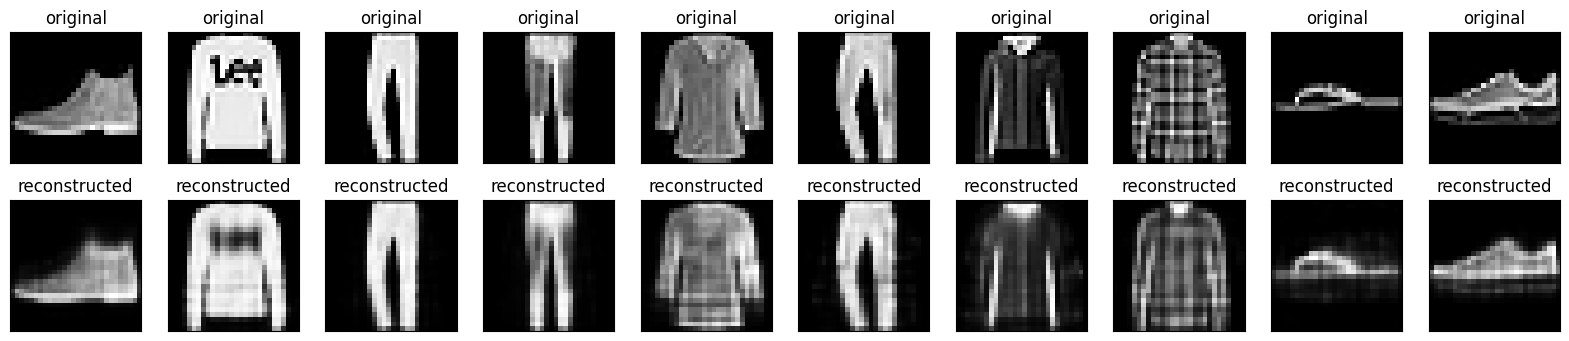

In [33]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  #display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_images[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()